----------------------------
#### CNN model with image augmentation and regularization

- Let's improve upon our `regularized` CNN model by adding in more data using a proper image  `augmentation` strategy. 
- Since our `previous` model was trained on the same small sample of data points each time, it `wasn't able to generalize` well and ended up overfitting after a few epochs.
    

- The idea behind `image augmentation` is that we follow a set process of taking in existing images from our training dataset and applying some `image transformation operations` to them, such as 
    - rotation, 
    - shearing, 
    - translation, 
    - zooming, and so on, 
    
to produce new, altered versions of existing images. 

Due to these `random transformations`, `we don't get the same images` each time, and we will leverage Python `generators` to feed in these new images to our model during training.

The Keras `framework` has an excellent utility called `ImageDataGenerator` that can help us in doing all the preceding operations. 

In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

from random import sample, randint 

In [5]:
location_train = r'D:\AI-DATASETS\02-MISC-large\keras\datasets\cats-dogs-data-LARGE\train'

In [6]:
train_dir = location_train+'\\'+'training_data'
val_dir   = location_train+'\\'+'validation_data'

In [7]:
train_files = glob.glob(train_dir+'/*')

**Keras load_img**

|Arg        | Description                            |
|-------    | ---------------                        |
|path	    | Path to image file.                    |
|grayscale	| DEPRECATED use color_mode="grayscale". |
|color_mode	| One of "grayscale", "rgb", "rgba". Default: "rgb". The desired image format.|
|target_size| either None (default to original size) or tuple of ints (img_height, img_width).|
|interpolation	| Interpolation method used to resample the image if the target size is different from that of the loaded image. Supported methods are "nearest", "bilinear", and "bicubic". If PIL version 1.1.3 or newer is installed, "lanczos" is also supported. If PIL version 3.4.0 or newer is installed, "box" and "hamming" are also supported. By default, "nearest" is used.|

In [8]:
IMG_DIM = (150, 150)

<class 'PIL.JpegImagePlugin.JpegImageFile'> JPEG RGB (305, 204)


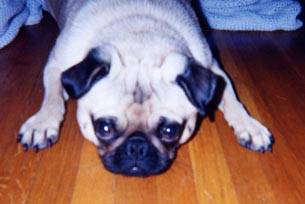

In [9]:
# load a random image
img = load_img(train_files[randint(0, len(train_files))])

# report details about the image
print(type(img), img.format, img.mode, img.size)

array_to_img(img)

We can confirm that the 
- image was loaded as a PIL image in JPEG format 
- with RGB channels and 
- the size of 640 by 427 pixels.... varying sizes

load all training images 
- PIL image (jpeg)

In [10]:
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]

convert to numpy array

In [11]:
train_imgs = np.array(train_imgs)
train_imgs.shape

(1500, 150, 150, 3)

extract labels 

In [12]:
train_labels = [fn.split('.')[0].split('\\')[-1] for fn in train_files]
len(train_labels)

1500

load validation samples

In [13]:
validation_files = glob.glob(val_dir+'/*')

validation_imgs   = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs   = np.array(validation_imgs)
validation_labels = [fn.split('.')[0].split('\\')[-1] for fn in validation_files]
len(validation_labels)


200

In [14]:
print('Train dataset shape:', train_imgs.shape, '\nValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (1500, 150, 150, 3) 
Validation dataset shape: (200, 150, 150, 3)


- we have 3000 training images and 1000 validation images. 
- Each image is of size 150 x 150 and has 3 channels for red, green, and blue (RGB), hence giving each image the (150, 150, 3) dimensions. 
- We will now scale each image with pixel values between (0, 255) to values between (0, 1) because deep earning models work really well with small input values:

In [15]:
train_imgs_scaled      = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')

train_imgs_scaled      /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


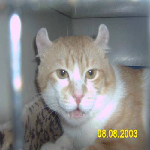

In [16]:
# visualize a sample image
print(train_imgs[0].shape)
array_to_img(train_imgs[15])

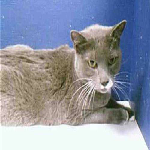

In [17]:
array_to_img(validation_imgs[15])

##### convert labels to numeric

In [18]:
batch_size  = 30
num_classes = 2
epochs      = 30
input_shape = (150, 150, 3)

In [19]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
le.fit(train_labels)

train_labels_enc      = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

In [21]:
le.classes_

array(['cat', 'dog'], dtype='<U3')

In [22]:
print(train_labels[1495:1505], train_labels_enc[1495:1505])

['dog', 'dog', 'dog', 'dog', 'dog'] [1 1 1 1 1]


**define data generators**

In [23]:
train_datagen = ImageDataGenerator(rescale           = 1./255, 
                                   zoom_range        = 0.3, 
                                   rotation_range    = 50,
                                   width_shift_range = 0.2, 
                                   height_shift_range= 0.2, 
                                   shear_range       = 0.2, 
                                   horizontal_flip   = True, 
                                   fill_mode         = 'nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['dog', 'dog', 'dog', 'dog', 'dog', 'dog']


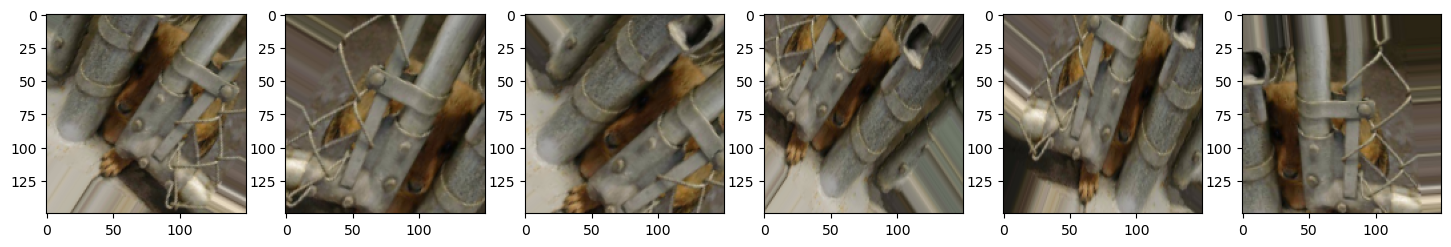

In [24]:
img_id = 1005
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], 
                                   train_labels[img_id:img_id+1],
                                   batch_size=1)

cat = [next(cat_generator) for i in range(0,6)]

fig, ax = plt.subplots(1,6, figsize=(18, 6))

print('Labels:', [item[1][0] for item in cat])

l = [ax[i].imshow(cat[i][0][0]) for i in range(0,6)]

Labels: ['dog', 'dog', 'dog', 'dog', 'dog', 'dog']


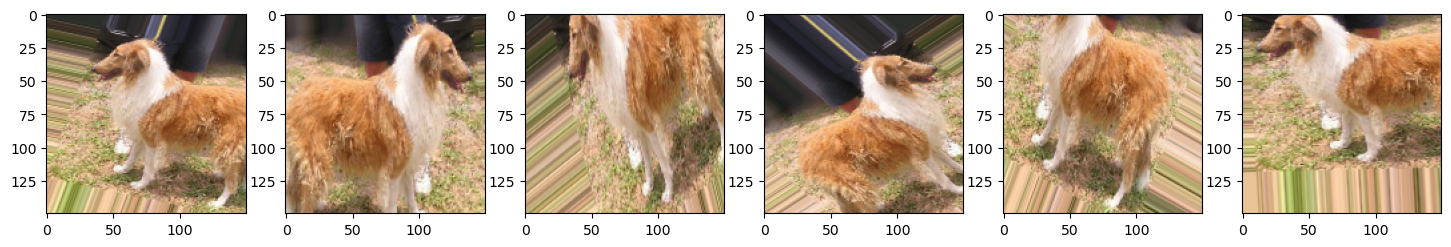

In [26]:
img_id = 991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], 
                                   train_labels[img_id:img_id+1],
                                   batch_size=1)

dog = [next(dog_generator) for i in range(0, 6)]

fig, ax = plt.subplots(1,6, figsize=(18, 6))

print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,6)]

#### CNN model with regularization & augmentation

- 1 more CONV layer
- 1 more Dense layer
- dropout layer

In [35]:
import tensorflow
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from tensorflow.keras import optimizers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [128]:
#!pip install git+https://github.com/tensorflow/docs

In [37]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer= optimizers.RMSprop(learning_rate=1e-4),
              metrics  = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        9280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [39]:
train_generator = train_datagen.flow(train_imgs, 
                                     train_labels_enc, 
                                     batch_size=30)

val_generator   = val_datagen.flow(validation_imgs, 
                                   validation_labels_enc, 
                                   batch_size=20)

input_shape = (150, 150, 3)

In [40]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

**arguments of fit_generator**

|arg name      | description |
|--------------| ------------|
|`steps_per_epoch` | As the name suggests, here we can specify the number of steps performed after a single epoch is finished and  the next epoch starts.|
|`Epochs`          | This parameter helps in knowing the model number of iterations for training the model.|
|`Verbose`         | Through this parameter, we can show the status of our model training. If passed as ‘0’ i.e. silent, there will be not updates. If passed as ‘1’, then a progress bar is displayed. Lastly, if passed as ‘2’, then one output line will be displayed for each epoch.|
|`callbacks `       | This gives the information about number of callback functions applied for training the model.|

|argument name   | description                                 |
|----------------| ------------------------------------------- |
|`batch_size`      |determines the number of samples in each `mini batch`. Its maximum is the number of all samples, which makes gradient descent accurate, the loss will decrease towards the minimum if the learning rate is small enough, but iterations are slower. Its minimum is 1, resulting in stochastic gradient descent: Fast but the direction of the gradient step is based only on one example, the loss may jump around. batch_size allows to adjust between the two extremes: accurate gradient direction and fast iteration. Also, the maximum value for batch_size may be limited if your model + data set does not fit into the available (GPU) memory.|
|`steps_per_epoch` |the number of batch iterations before a training epoch is considered finished. If you have a training set of fixed size you can ignore it but it may be useful if you have a huge data set or if you are generating random data augmentations on the fly, i.e. if your training set has a (generated) infinite size. |
|`validation_steps` |similar to `steps_per_epoch` but on the `validation data set` instead on the training data. |

In [41]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch  = 100, 
                              epochs           = 100,
                              validation_data  = val_generator, 
                              validation_steps = 50, 
                              verbose          = 1,
                              callbacks=[early_stop, tfdocs.modeling.EpochDots()])

C:\Users\v-bsinha\AppData\Local\Temp/ipykernel_15860/1345109770.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5120
Epoch: 0, accuracy:0.5120,  loss:0.6931,  val_accuracy:0.5010,  val_loss:0.6890,  
100/100 [==============================] - 96s 947ms/step - loss: 0.6931 - accuracy: 0.5120 - val_loss: 0.6890 - val_accuracy: 0.5010
Epoch 2/100
100/100 [==============================] - 91s 904ms/step - loss: 0.6860 - accuracy: 0.5450 - val_loss: 0.6697 - val_accuracy: 0.5720
Epoch 3/100
100/100 [==============================] - 92s 917ms/step - loss: 0.6738 - accuracy: 0.5773 - val_loss: 0.6793 - val_accuracy: 0.5510
Epoch 4/100
100/100 [==============================] - 88s 879ms/step - loss: 0.6584 - accuracy: 0.5993 - val_loss: 0.6366 - val_accuracy: 0.6450
Epoch 5/100
100/100 [==============================] - 91s 908ms/step - loss: 0.6445 - accuracy: 0.6223 - val_loss: 0.6163 - val_accuracy: 0.6540
Epoch 6/100
100/100 [==============================] - 88s 874ms/step - loss: 0.6316 - accuracy: 0.640

In [42]:
len(history.history['accuracy'])

72

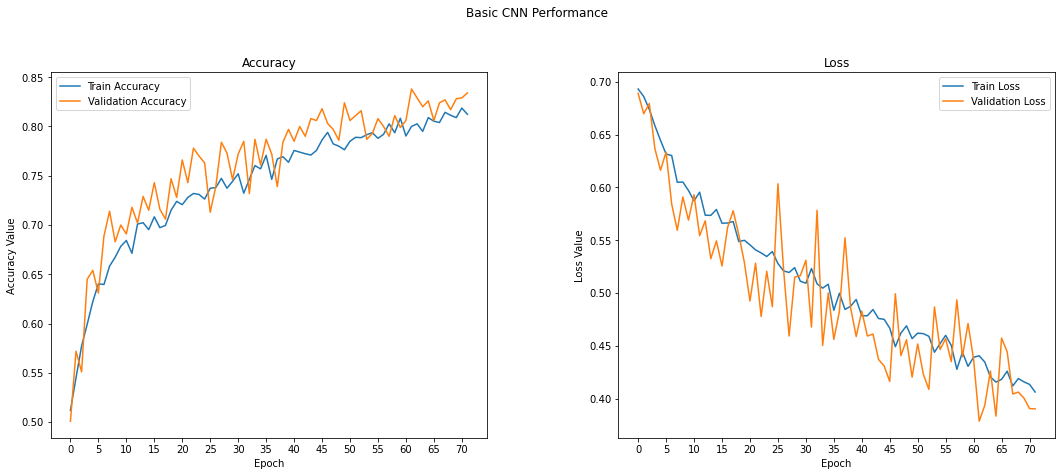

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,31))

ax1.plot(range(len(history.history['accuracy'])), history.history['accuracy'],     label='Train Accuracy')
ax1.plot(range(len(history.history['accuracy'])), history.history['val_accuracy'], label='Validation Accuracy')

ax1.set_xticks(np.arange(0, len(history.history['accuracy']), 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(range(len(history.history['accuracy'])), history.history['loss'],     label='Train Loss')
ax2.plot(range(len(history.history['accuracy'])), history.history['val_loss'], label='Validation Loss')

ax2.set_xticks(np.arange(0, len(history.history['accuracy']), 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

While there are some `spikes` in the `validation accuracy` and `loss`, overall, we see that it is much closer to the training accuracy, with the loss indicating that we obtained a model that generalizes much better as compared to our previous models. 

Training and validation accuracies are around 82%

Let's save this model now so we can evaluate it later on our test dataset:

#### Saving model/parameters

In [44]:
import pickle
import os

In [48]:
def model_save(model, encoder, model_save_path):
    _create_folder_if_it_doesnt_exist(model_save_path)
    _save_parameters(model_save_path)
    _save_weights(model_save_path)
    _save_encoder(model_save_path, encoder)

def _create_folder_if_it_doesnt_exist(model_save_path):
    if not os.path.exists(model_save_path):
        os.makedirs(model_save_path)

def _save_parameters(model_save_path):
    parameters = [
        input_shape,
    ]
    save_parameters_file = os.path.join(model_save_path, "03_CNN_reg_aug_parameters.pkl")
    with open(save_parameters_file, "wb") as f:
        pickle.dump(parameters, f)

def _save_weights(model_save_path):
    save_weights_file = os.path.join(model_save_path, "03_CNN_reg_aug_weights.h5")
    model.save_weights(save_weights_file)
    
def _save_encoder(model_save_path, encoder):
    save_encoder_file = os.path.join(model_save_path, "03_CNN_reg_aug_encoder.pkl")
    with open(save_encoder_file, "wb") as f:
        pickle.dump(encoder, f)



In [49]:
model_save_path = './transfer_learning_models_save'

model_save(model=model, encoder=le, model_save_path=model_save_path)